In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from numpy import median
from datetime import date

In [2]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/output.csv"
meps_df = pd.read_csv(path, sep = ";")

In [3]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,memberships,born_place,born_day,born_month,born_year,disability,born_lat,born_lon,relatives,educated_at,highest_degree,occupation
0,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,30.0,4.0,1986.0,NaN,51.513889,7.465278,NaN,NaN,university,"politician,journalist,manager"
1,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,27.0,10.0,1971.0,NaN,41.350000,13.416667,NaN,Sapienza University of Rome,university,"politician,businessperson,lawyer,manager"
2,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,28.0,5.0,1959.0,NaN,39.361952,-9.157131,NaN,University of Évora,phd,"politician,official,professor"
3,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,27.0,5.0,1987.0,NaN,50.631944,3.057500,NaN,Sciences Po,NaN,"politician,lawyer,activist"
4,124812,fabio massimo castaldo,Castaldo,Fabio Massimo,IT,Renew,MALE,"AFET,SEDE,ECON,D-CL,DSCA,DLAT,DEPA",Rome,18.0,9.0,1985.0,NaN,41.893056,12.482778,NaN,Tor Vergata University of Rome,university,"politician,lawyer"


In [4]:
group_list = list(set(meps_df["group"].tolist()))
country_list = list(set(meps_df["country"].tolist()))

In [5]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
org_list = list(set(org_list))
org_list.remove("nan")
org_list[:5]

['DMAS', 'D-AL', 'DPAC', 'D-MD', 'D-IN']

In [6]:
committee_list = [org for org in org_list if org[0] != "D"]
committee_list[:5]

['ECON', 'PETI', 'LIBE', 'AGRI', 'BUDG']

In [7]:
occupation_list = []
for list_entry in meps_df["occupation"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            occupation_list.append(entry)
occupation_list = list(set(occupation_list))
occupation_list.remove("nan")
occupation_list[:5]

['q2827803',
 'french environment and energy management agency',
 'conspiracy theorist',
 'essayist',
 'poet']

In [8]:
degree_list = ["secondary", "university", "phd"]

In [9]:
educated_at_list = []
for list_entry in meps_df["educated_at"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            educated_at_list.append(entry)
educated_at_list = list(set(educated_at_list))
#for entry in educated_at_list:
#    filter_educated_at_list = educated_at_list.copy()
#    filter_educated_at_list.remove(entry)
#    for second_entry in filter_educated_at_list:
#        if entry in second_entry and entry in educated_at_list:
#            educated_at_list.remove(entry)
#educated_at_list.remove("nan")
educated_at_list[:5]

['University of Wisconsin–La Crosse',
 'University of Warwick',
 'University of Paris 1 Pantheon-Sorbonne',
 'Saarland University',
 'Aalto University School of Business']

## Gender

In [10]:
def filter_women_perc_df(column, column_entries, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[column_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "Percentage of women"})
    return filter_percentage_df.sort_values("Percentage of women")

How many MEPs are female?

In [11]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df.to_csv("scrolly_gender_meps.csv", index = False)
gender_percentages_df

,gender,count,percentage
0,MALE,425,0.603693
1,FEMALE,279,0.396307


How is that split along faction lines?

In [12]:
group_women_perc_df = filter_women_perc_df("group", group_list, meps_df)
group_women_perc_df.sort_values("Percentage of women")

,Percentage of women
ECR,27.941176
NI,33.333333
ID,36.206897
PPE,36.931818
Renew,42.156863
S&D,42.857143
Verts/ALE,48.611111
The Left,51.351351


How is split along country lines?

In [13]:
country_women_perc_df = filter_women_perc_df("country", country_list, meps_df)
country_women_perc_df.sort_values("Percentage of women")[:10]
#country_women_perc_df = country_women_perc_df.reset_index().rename(columns = {"index": "country"})
#country_women_perc_df.to_csv("gender_country.csv", index = False)

,Percentage of women
RO,15.151515
CY,16.666667
GR,23.809524
LT,27.272727
EE,28.571429
SK,28.571429
BG,29.411765
CZ,33.333333
HR,33.333333
MT,33.333333


In [14]:
country_women_perc_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
LU,66.666667
FI,57.142857
SE,52.380952
ES,50.847458
FR,48.101266
PT,47.619048
IT,46.052632
NL,44.827586
LV,42.857143
DK,42.857143


How about per committee?

In [15]:
committee_percentage_df = filter_women_perc_df("memberships", committee_list, meps_df)
committee_percentage_df.sort_values("Percentage of women")[:10]

,Percentage of women
AFCO,21.818182
SEDE,25.454545
BUDG,27.272727
AFET,29.220779
ECON,30.172414
FISC,31.372549
JURI,33.333333
TRAN,34.693878
CONT,35.087719
PETI,36.363636


In [16]:
committee_percentage_df.sort_values("Percentage of women", ascending = False)[:10]

,Percentage of women
FEMM,85.074627
EMPL,55.882353
SANT,52.727273
ENVI,47.337278
IMCO,44.047619
PECH,44.000000
LIBE,43.703704
CULT,43.103448
REGI,41.666667
AGRI,39.560440


In [17]:
memberships_df = meps_df.loc[meps_df["memberships"].notna()]
memberships_df = memberships_df.loc[memberships_df["memberships"].str.contains("AFCO")]
memberships_df["gender"].value_counts()

MALE      43
FEMALE    12
Name: gender, dtype: int64

## Place of birth

Where were MEPs born?

In [51]:
#meps_df["born_region"].value_counts()

Which countries have MEPs born in other countries?

In [52]:
#origins_by_country_df = meps_df.groupby("country")["born_region"].value_counts().unstack(fill_value=0)
#origins_by_country_df = origins_by_country_df.reset_index()[["country", "native", "eu", "other"]]
#origins_by_country_df["total"] = origins_by_country_df[["native", "eu", "other"]].sum(axis = 1)
#origins_by_country_df["total"] = round(origins_by_country_df[["native", "eu", "other"]].sum(axis = 1), 2)
#origins_by_country_df["native_pc"] = round(origins_by_country_df["native"] / origins_by_country_df["total"], 2)
#origins_by_country_df["eu_pc"] = round(origins_by_country_df["eu"] / origins_by_country_df["total"], 2)
#origins_by_country_df["other_pc"] = round(origins_by_country_df["other"] / origins_by_country_df["total"], 2)
#origins_by_country_df = origins_by_country_df.sort_values(by = "native_pc", ascending = False)
#origins_by_country_df[:10]

In [53]:
#non_native_df = origins_by_country_df[["country", "eu_pc", "other_pc"]]
#non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100
#non_native_df = non_native_df.drop(["eu_pc", "other_pc"], axis = 1)
#non_native_df = non_native_df.sort_values("non_native_pc", ascending = False)
#non_native_df.to_csv("non_native.csv", index = False, sep =";")
#non_native_df[:10]

Wurden diese Abgeordneten in der EU oder außerhalb geboren?

In [54]:
#origins_by_country_df.sort_values("eu_pc", ascending = False).head()

In [55]:
#origins_by_country_df.sort_values("other_pc", ascending = False).head()

Which German MEPs were not born in Germany?

In [56]:
#meps_df.loc[(meps_df["country"] == "DE") & (meps_df["born_region"] != "native")]

## Education

For how many MEPs do we have degree data?

In [57]:
len(meps_df.loc[meps_df["highest_degree"].notna()].index)

326

In [58]:
len(meps_df.loc[meps_df["educated_at"].notna()].index)

450

In [59]:
def check_education_na(meps_df, column, group):
    check_notna_df = meps_df.loc[meps_df[column].notna()]
    check_notna_df = pd.DataFrame(check_notna_df.groupby(group).size()).reset_index().rename(columns = {0: "notna"})
    check_na_df = meps_df.loc[~meps_df[column].notna()]
    check_na_df = pd.DataFrame(check_na_df.groupby(group).size()).reset_index().rename(columns = {0: "na"})
    check_notna_df = check_notna_df.merge(check_na_df, on = group)
    check_na_df["na_ratio"] = check_na_df["na"] / (check_notna_df["notna"] + check_notna_df["na"])
    check_na_df = check_na_df.sort_values("na_ratio")
    return check_na_df

Does that change along faction lines?

In [60]:
highest_degree_na_df = check_education_na(meps_df, "highest_degree", "group")
highest_degree_na_df

,group,na,na_ratio
2,NI,23,0.450980
5,S&D,64,0.457143
4,Renew,49,0.480392
3,PPE,88,0.500000
7,Verts/ALE,39,0.541667
0,ECR,46,0.676471
1,ID,41,0.706897
6,The Left,28,0.756757


In [61]:
educated_at_group_na_df = check_education_na(meps_df, "educated_at", "group")
educated_at_group_na_df

,group,na,na_ratio
4,Renew,31,0.303922
2,NI,16,0.313725
0,ECR,22,0.323529
5,S&D,47,0.335714
3,PPE,66,0.375000
7,Verts/ALE,27,0.375000
6,The Left,17,0.459459
1,ID,28,0.482759


How about country lines?

In [62]:
highest_degree_country_df = check_education_na(meps_df, "highest_degree", "country")
highest_degree_country_df

,country,na,na_ratio
3,CY,1,0.166667
7,EE,2,0.285714
23,RO,11,0.333333
17,LU,2,0.333333
13,HU,8,0.380952
5,DE,37,0.385417
0,AT,8,0.421053
18,LV,3,0.428571
8,ES,26,0.440678
9,FI,7,0.500000


In [63]:
educated_at_country_df = check_education_na(meps_df, "educated_at", "country")
educated_at_country_df

,country,na,na_ratio
11,HU,1,0.047619
23,SI,1,0.125000
16,LV,1,0.142857
5,DK,2,0.142857
12,IE,2,0.153846
17,MT,1,0.166667
10,HR,2,0.166667
14,LT,2,0.181818
19,PL,11,0.211538
24,SK,3,0.214286


What are the highest degrees that MEPs have achieved?

In [ ]:
degree_count_df = pd.DataFrame(meps_df.value_counts("highest_degree"))
degree_count_df = degree_count_df.reindex(degree_list)
degree_count_df = degree_count_df.reset_index().rename(columns = {0: "count"})
degree_count_df.to_csv("degree_count.csv", index = False, sep =";")
degree_count_df

How many MEPs went to university?

In [ ]:
mep_university_df = degree_count_df
university_yes = ["university", "phd"]
mep_university_yes_df = mep_university_df.loc[mep_university_df["highest_degree"].isin(university_yes)]
mep_university_no_df = mep_university_df.loc[~mep_university_df["highest_degree"].isin(university_yes)]
grouped_sum = mep_university_yes_df.groupby("highest_degree")["count"].sum()
new_row = pd.DataFrame({"highest_degree": ["university"], "count": [grouped_sum.sum()]})
mep_university_df = mep_university_no_df.append(new_row, ignore_index=True)
mep_university_df = mep_university_df.rename(columns = {"highest_degree": "degree"})
mep_university_df.to_csv("scrolly_degree_meps.csv", index = False, sep =";")
mep_university_df

Does degree composition change along group lines?

In [ ]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    degree_dict = {}
    for degree in degree_list:
        degree_dict[degree] = 0
    notna_df = group_df.loc[group_df["highest_degree"].notna()]["highest_degree"]
    for entry in notna_df.tolist():
        for degree in degree_list:
            if degree in entry:
                degree_dict[degree] += 1
    overall_dict[group] = degree_dict
group_degree_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_degree_df["total"] = group_degree_df.sum(axis = 1)
for column in group_degree_df.columns:
    group_degree_df[column] = round(group_degree_df[column] / group_degree_df["total"] * 100, 2)
group_degree_df = group_degree_df.drop(columns = "total")
group_degree_df

Where were MEPs educated?

In [ ]:
notna_df = meps_df.loc[meps_df["educated_at"].notna()]["educated_at"]
educated_at_df = notna_df.value_counts("educated_at")
educated_at_dict = {}
for entry in notna_df.tolist():
    for university in entry.split(","):
        if university not in educated_at_dict.keys():
            educated_at_dict[university] = 1
        else:
            educated_at_dict[university] += 1
educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
educated_at_df = educated_at_df.rename(columns = {0: "count"})
educated_at_df = educated_at_df.drop(index = "Faculty of Law and Administration")
educated_at_df = educated_at_df.sort_values("count", ascending = False)
educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university"})
educated_at_df = educated_at_df[:10]
educated_at_df.to_csv("educated_at.csv", index = False, sep =";")
educated_at_df

In which countries are MEPs likely to have gone to the same universities?

In [ ]:
def get_top_uni_pc(column, entry):
    filter_df = meps_df.loc[meps_df[column] == entry]
    educated_at_dict = {}
    for educated_at in educated_at_list:
        educated_at_dict[educated_at] = 0
    notna_df = filter_df.loc[filter_df["educated_at"].notna()]["educated_at"]
    for entry in notna_df.tolist():
        for educated_at in educated_at_list:
            if educated_at in entry:
                educated_at_dict[educated_at] += 1
    educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
    educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university", 0: "count"})
    educated_at_df = educated_at_df.sort_values(by = "count", ascending = False)
    mep_count = len(notna_df.index)
    total_mep_count = len(filter_df.index)
    top_uni = educated_at_df["university"].values[0]
    top_uni_count = educated_at_df["count"].values[0]
    top_uni_pc = round(top_uni_count / mep_count * 100, 2)
    return top_uni, top_uni_pc, top_uni_count, mep_count, total_mep_count

In [ ]:
country_uni_dict = {}
for country in country_list:
    country_uni_dict[country] = get_top_uni_pc("country", country)
country_uni_df = pd.DataFrame.from_dict(country_uni_dict, orient = "index")
country_uni_df = country_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
country_uni_df = country_uni_df.sort_values("percentage", ascending = False)
country_uni_df

What about groups?

In [ ]:
group_uni_dict = {}
for group in group_list:
    group_uni_dict[group] = get_top_uni_pc("group", group)
group_uni_df = pd.DataFrame.from_dict(group_uni_dict, orient = "index")
group_uni_df = group_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
group_uni_df = group_uni_df.sort_values("percentage", ascending = False)
group_uni_df

## Occupations

How about occupation data?

In [19]:
len(meps_df.loc[meps_df["occupation"].notna()].index)

653

What are the most common occupations?

In [20]:
occupation_dict = {}
for occupation in occupation_list:
    occupation_dict[occupation] = 0
notna_df = meps_df.loc[meps_df["occupation"].notna()]["occupation"]
for entry in notna_df.tolist():
    for occupation in occupation_list:
        if occupation in entry:
            occupation_dict[occupation] += 1
occupation_count_df = pd.DataFrame.from_dict(occupation_dict, orient = "index")
occupation_count_df = occupation_count_df.rename(columns = {0: "count"})
occupation_count_df = occupation_count_df.sort_values("count", ascending = False)
occupation_count_df["percentage"] = round(occupation_count_df["count"] / len(notna_df.index), 3) * 100
occupation_count_df = occupation_count_df.drop(columns = "count", index = "politician")
occupation_count_df = occupation_count_df.reset_index().rename(columns = {"index": "occupation"})
occupation_count_df = occupation_count_df[:10]
occupation_count_df.to_csv("occupation_count.csv", index = False, sep =";")
occupation_count_df

,occupation,percentage
0,manager,23.7
1,lawyer,18.5
2,researcher,14.9
3,official,13.0
4,professor,12.1
5,journalist,10.6
6,teacher,7.0
7,consultant,4.7
8,diplomat,3.7
9,engineer,3.7


Does occupation composition change along group lines?

In [21]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    occupation_dict = {}
    for occupation in occupation_list:
        occupation_dict[occupation] = 0
    notna_df = group_df.loc[group_df["occupation"].notna()]["occupation"]
    for entry in notna_df.tolist():
        for occupation in occupation_list:
            if occupation in entry:
                occupation_dict[occupation] += 1 #XXXX
    overall_dict[group] = occupation_dict
group_occupation_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_occupation_df["total"] = group_occupation_df.sum(axis = 1)
for column in group_occupation_df.columns:
    group_occupation_df[column] = round(group_occupation_df[column] / group_occupation_df["total"] * 100, 2)
group_occupation_df = group_occupation_df.drop(columns = "total")
group_occupation_df

,q2827803,french environment and energy management agency,conspiracy theorist,essayist,poet,cook,doctor,musician,horn player,designer,...,columnist,entrepreneur,slavist,trade unionist,translator,caricaturist,pianist,singer,bank officer,jazz musician
PPE,0.00,0.00,0.00,0.26,0.26,0.00,1.05,0.26,0.00,0.26,...,0.00,0.26,0.26,0.52,0.00,0.00,0.00,0.00,0.26,0.00
S&D,0.00,0.00,0.00,0.00,0.00,0.00,1.99,0.00,0.00,0.00,...,0.28,0.00,0.00,1.14,0.57,0.28,0.00,0.00,0.00,0.00
Renew,0.00,0.00,0.00,0.00,0.00,0.00,1.64,0.00,0.41,0.00,...,0.00,0.41,0.00,0.41,0.00,0.00,0.00,0.41,0.00,0.00
ECR,0.00,0.00,0.00,0.00,0.00,0.00,1.64,0.00,0.00,0.00,...,0.00,0.00,0.00,0.82,0.00,0.00,0.00,0.00,0.00,0.00
The Left,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.90,0.00,0.00,0.00,0.00,0.00,0.00
NI,0.00,0.00,0.76,0.00,0.00,0.00,1.52,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ID,0.00,0.00,0.00,0.00,0.00,0.00,1.85,0.00,0.00,0.00,...,0.00,0.00,0.00,0.93,0.00,0.00,0.00,0.00,0.00,0.00
Verts/ALE,0.00,0.68,0.00,0.00,0.00,0.68,0.68,0.68,0.00,0.00,...,0.00,0.68,0.00,0.00,0.68,0.00,0.68,0.00,0.00,0.68


Is there a "lawyers' party"?

In [22]:
group_occupation_df["lawyer"].sort_values(ascending = False)

ID           14.81
PPE           9.71
NI            9.09
S&D           8.26
Renew         6.97
Verts/ALE     4.05
ECR           2.46
The Left      1.45
Name: lawyer, dtype: float64

Is there a "farmers' party"?

In [23]:
group_occupation_df["farmer"].sort_values(ascending = False)

Renew        2.46
Verts/ALE    1.35
PPE          1.05
NI           0.76
S&D          0.57
ECR          0.00
The Left     0.00
ID           0.00
Name: farmer, dtype: float64

Hoes does occupation by sector compare to the general population?

In [24]:
employment_sector_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/employment_by_sector_reference.csv")
employment_sector_df = employment_sector_df.loc[employment_sector_df["geo"] == "EU27_2020"]
employment_sector_df = employment_sector_df[["nace_r2", "OBS_VALUE"]]
employment_sector_df["nace_r2"] = employment_sector_df["nace_r2"].replace({
    "A": "agriculture", 
    "B-E": "industry (except construction)",
    "C": "manufacturing",
    "F": "construction",
    "G-I": "wholesale and retail trading",
    "J": "communication",
    "K": "financial",
    "L": "real estate",
    "M_N": "research & administration",
    "O-Q": "public service",
    "R-U": "arts & entertainment",
    "TOTAL": "total"
})
employment_sector_df = employment_sector_df.transpose()
employment_sector_df.columns = employment_sector_df.iloc[0]
employment_sector_df = employment_sector_df[1:]
employment_sector_df

nace_r2,agriculture,industry (except construction),manufacturing,construction,wholesale and retail trading,communication,financial,real estate,research & administration,public service,arts & entertainment,total
OBS_VALUE,4.1,15.4,13.9,6.7,24.2,3.3,2.3,1.1,12.9,24.1,5.9,100.0


## Age

In [25]:
len(meps_df.loc[meps_df["born_year"].notna()].index)

703

In [111]:
def calculate_age(born_year, born_month, born_day):
    today = date.today()
    if born_month < today.month:
        return today.year - born_year
    elif born_month == today.month:
        if born_day <= today.day:
            return today.year - born_year
        return today.year - born_year - 1
    return today.year - born_year - 1   

How are MEPs' ages distributed?

In [120]:
meps_ages_df = meps_df[["born_year", "born_month", "born_day"]].copy()
meps_ages_df["age"] = meps_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
meps_ages_df.head()

,born_year,born_month,born_day,age
0,1986.0,4.0,30.0,38.0
1,1971.0,10.0,27.0,52.0
2,1959.0,5.0,28.0,64.0
3,1987.0,5.0,27.0,36.0
4,1985.0,9.0,18.0,38.0


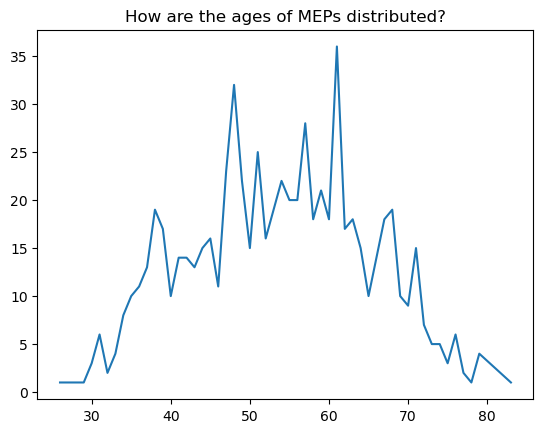

In [121]:
meps_age_groups_df = meps_ages_df
meps_age_groups_df = meps_age_groups_df.groupby("age").size()
meps_age_groups_df = pd.DataFrame(meps_age_groups_df).reset_index().rename(columns = {0: "count"})
plt.plot(meps_age_groups_df["age"], meps_age_groups_df['count'])
plt.title("How are the ages of MEPs distributed?")
plt.show()

How do MEPs' ages divide into buckets?

In [123]:
meps_ages_df['age_buckets'] = pd.cut(meps_ages_df['age'], 
                                      bins = [0, 30, 50, 70, 100], 
                                      labels=['0-30', '30-50', '50-70', '70-100'])
meps_ages_df['age_buckets']
grouped_sum = meps_ages_df.groupby('age_buckets').size()
age_buckets_df = pd.DataFrame(grouped_sum).reset_index().rename(columns = {0: "count"})
age_buckets_df.to_csv("scrolly_age_meps.csv", index = False)
age_buckets_df

,age_buckets,count
0,0-30,6
1,30-50,275
2,50-70,373
3,70-100,49


What's the Parliament's median age?

In [124]:
meps_ages_df = meps_ages_df.loc[meps_ages_df["born_year"].notna()]
ages = meps_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
ages = sorted(ages.to_list())
median(ages)

54.0

How do committees vary in median age?

In [125]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    df = df.loc[meps_df["born_year"].notna()]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        ages = filter_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
        ages = sorted(ages)
        median_age_dict[filter_entry] = median(ages)
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    median_age_df = median_age_df.sort_values("median_age")
    return median_age_df

In [126]:
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df[:10]

,committee,median_age
2,LIBE,49.0
21,SANT,50.0
1,PETI,50.5
6,IMCO,51.0
14,FEMM,52.0
12,JURI,52.0
17,ITRE,52.5
13,EMPL,52.5
5,REGI,53.0
20,TRAN,53.0


In [104]:
committee_median_age_df.sort_values("median_age", ascending = False)[:10]

,committee,median_age
7,AFCO,59.0
16,SEDE,57.0
18,INTA,56.0
3,AGRI,55.0
4,BUDG,55.0
8,FISC,55.0
15,PECH,54.0
10,CULT,54.0
9,AFET,54.0
0,ECON,54.0


In [105]:
org_median_age_df = get_median_age("memberships", org_list, meps_df)
org_median_age_df[:10]

,org,median_age
27,D-IQ,48.0
51,D-ME,49.0
10,LIBE,49.0
17,DCAR,50.0
9,D-RS,50.0
71,SANT,50.0
1,D-AL,50.0
8,PETI,50.5
50,D-CA,50.5
4,D-IN,51.0


In [106]:
org_median_age_df.sort_values("median_age", ascending = False)[:10]

,org,median_age
35,DNAT,60.0
2,DPAC,60.0
56,D-BY,60.0
21,AFCO,59.0
58,DEVE,59.0
42,D-IL,58.5
15,DPAP,58.0
29,DCAS,57.5
37,DSCA,57.5
18,DAFR,57.0


In [107]:
group_median_age_df = get_median_age("group", group_list, meps_df)
group_median_age_df = group_median_age_df.rename(columns = {"org": "group"})
group_median_age_df.sort_values("median_age")

,group,median_age
7,Verts/ALE,48.0
4,The Left,50.0
2,Renew,52.0
5,NI,53.0
0,PPE,55.0
1,S&D,55.0
6,ID,57.0
3,ECR,58.0


Does median age differ from country to country?

In [108]:
country_median_age_df = get_median_age("country", country_list, meps_df)
country_median_age_df = country_median_age_df.rename(columns = {"org": "country"})
country_median_age_df.head()

,country,median_age
8,MT,43.5
14,PT,47.0
19,CZ,48.0
18,HU,49.0
24,NL,50.0


How does that compare to countries' median ages?

In [109]:
ages_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/ages.csv")
ages_df = ages_df.rename(columns = {" years": "country_median"})
ages_df = ages_df[["slug", "country_median"]]
ages_df.head()

,slug,country_median
0,monaco,56.2
1,italy,48.1
2,andorra,48.1
3,germany,46.7
4,spain,46.3


In [110]:
median_age_difference_df = country_median_age_df
def get_country_code(slug):
    code_dict = {
        "MT": "malta",
        "NL": "netherlands",
        "CZ": "czechia",
        "HU": "hungary",
        "PT": "portugal",
        "SE": "sweden",
        "BG": "bulgaria",
        "HR": "croatia",
        "DE": "germany",
        "ES": "spain",
        "RO": "romania",
        "AT": "austria",
        "BE": "belgium",
        "IT": "italy",
        "SK": "slovakia",
        "FR": "france",
        "DK": "denmark",
        "IE": "ireland",
        "EE": "estonia",
        "GR": "greece",
        "SI": "slovenia",
        "CY": "cyprus",
        "LU": "luxembourg",
        "PL": "poland",
        "FI": "finland",
        "LV": "latvia",
        "LT": "lithuania"
    }
    return code_dict[slug]
median_age_difference_df["slug"] = median_age_difference_df["country"].apply(get_country_code)
median_age_difference_df = median_age_difference_df.rename(columns = {"median_age": "mep_median"})
median_age_difference_df = median_age_difference_df.merge(ages_df, on = "slug", how = "left")
median_age_difference_df = median_age_difference_df.drop(["country"], axis = 1)
median_age_difference_df = median_age_difference_df.rename(columns = {"slug": "country"})
median_age_difference_df["country_median"] = round(median_age_difference_df["country_median"], 0).astype(int)
median_age_difference_df["difference"] = median_age_difference_df["mep_median"] - median_age_difference_df["country_median"]
median_age_difference_df = median_age_difference_df.sort_values("country_median", ascending = False)
median_age_difference_df.to_csv("median_age_difference.csv", index = False, sep =";")
median_age_difference_df

,mep_median,country,country_median,difference
12,53.5,italy,48,5.5
10,53.5,germany,47,6.5
18,57.0,slovenia,46,11.0
20,58.0,greece,46,12.0
8,53.0,spain,46,7.0
1,47.0,portugal,46,1.0
26,65.0,lithuania,45,20.0
25,65.0,latvia,45,20.0
7,52.0,bulgaria,45,7.0
9,53.0,romania,45,8.0
